# PCA w/ scikit-learn library

## Import libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [2]:
pd.options.display.max_columns = None

## Load the data into dataframe

In [3]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

print('Training:', X_train.shape, y_train.shape)
print('Testing:', X_test.shape, y_test.shape)

Training: (124, 13) (124,)
Testing: (54, 13) (54,)


## Standardization

In [6]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## PCA

In [7]:
# initialize pca and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

In [8]:
# Fit and transform the data
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

lr.fit(X_train_pca, y_train)

LogisticRegression(solver='liblinear')

### Visualize the decision regions

In [10]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y==c1, 0],
            y=X[y==c1, 1],
            alpha=0.6,
            c=[cmap(idx)],
            edgecolor='black',
            marker=markers[idx],
            label=c1)

/home/user/miniconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


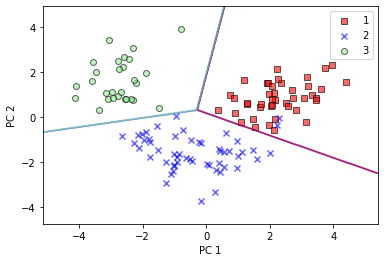

In [11]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.show()

/home/user/miniconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


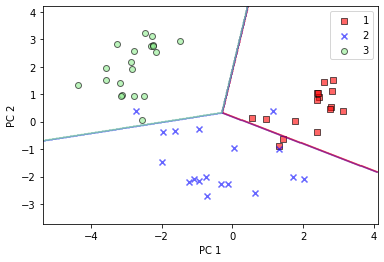

In [12]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.show()

In [13]:
# For explained variance ratio
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_sc)

# get the component variance
# Proportion of Variance across PCs
pca.explained_variance_ratio_

array([0.35305835, 0.19181454, 0.10571994, 0.08521068, 0.06802939,
       0.04938154, 0.04410786, 0.02422936, 0.02208494, 0.01922333,
       0.01762138, 0.01290847, 0.00661021])

In [14]:
# Cumulative proportion of variance
np.cumsum(pca.explained_variance_ratio_)

array([0.35305835, 0.54487289, 0.65059282, 0.7358035 , 0.80383289,
       0.85321444, 0.8973223 , 0.92155166, 0.94363661, 0.96285993,
       0.98048132, 0.99338979, 1.        ])

In [16]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC" + str(i) for i in range(1, num_pc + 1)]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_wine.iloc[:, 1:].columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
variable,,,,,,,,,,,,,
1,0.211549,0.457042,0.154587,-0.086783,-0.241488,-0.109379,-0.155625,0.389973,0.458148,0.184664,-0.320607,-0.326128,0.123305
2,-0.218678,0.232489,-0.147492,0.536830,-0.027945,-0.049001,-0.673141,0.110952,-0.245826,-0.202690,-0.091000,0.062619,-0.076563
3,-0.004138,0.350514,-0.590736,-0.249863,-0.039337,-0.234835,0.074892,-0.235500,-0.387456,0.358161,-0.208001,-0.010281,0.161825
4,-0.271355,0.028780,-0.567978,-0.001090,0.184920,-0.079573,0.269059,0.543056,0.245261,-0.253745,0.238391,-0.064401,-0.097935
5,0.171965,0.246814,-0.017648,-0.235732,0.802380,0.091963,-0.264050,-0.223223,0.232525,-0.098446,-0.051105,0.020732,-0.122504
6,0.398820,0.030809,-0.214489,0.146344,-0.140639,-0.013011,0.103575,-0.297293,0.092521,-0.647490,-0.041091,-0.163470,0.444181
7,0.427171,-0.049514,-0.174593,0.122369,-0.141499,-0.030153,0.093460,-0.090137,-0.072334,-0.048491,-0.103236,-0.274720,-0.798820
8,-0.278392,0.085105,-0.239810,-0.314081,-0.403147,0.549378,-0.253953,-0.301203,0.312506,-0.046387,0.141616,0.004391,-0.140190
9,0.297095,-0.036753,-0.191907,0.371528,0.162205,0.693953,0.102303,0.188802,-0.093212,0.354757,-0.011849,-0.064874,0.206494


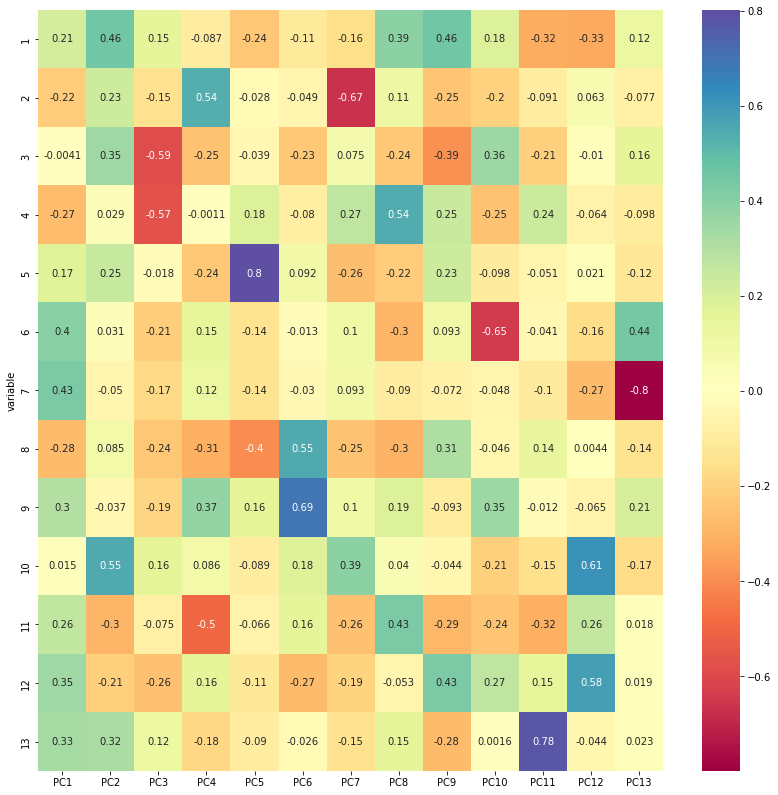

In [20]:
# Plot heatmap
plt.figure(figsize=(14, 14))
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()